In [19]:
import numpy as np

### Derivative

A function of a real variable $f(x)$ is differentiable at a point $a$ of its domain if this limit exists, then:

$$\frac{df}{dx}(a) = \lim_{h \rightarrow 0}\frac{f(a + h) - f(a)}{h}$$

In [70]:
# Calculate the derivative of a function, [f(x+a)-f(x-a)]/2*a, at the points of a numpy array.
def derivative(func, arr, h = 0.001):
    numer = (func(arr + h) - func(arr - h))
    denom = 2 * h
    
    return numer / denom

### Chain Rule

If $y$ is a function of $u$ (i.e. $y := y(u)$), and $u$ is a function of $x$ (i.e. $u := u(x)$), then:

$$\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}$$

provided that both $\frac{dy}{du}$ and $\frac{du}{dx}$ exists.

### Composite Functions

Given two function $f$ and $g$, the *composite function* $(f \circ g)$ is defined by:

$$ (f \circ g)(x) = f(g(x)) $$

If $f$ and $g$ have derivatives, then the composite function $h(x) = f(g(x))$ has a derivative given by the chain rule:

$$\frac{dh(x)}{dx} = \frac{df(g(x))}{dg(x)}\frac{dg(x)}{dx} ,$$
$$h^\prime(x) = f^\prime(g(x))g^\prime(x)$$

In [68]:
# Square each point in a numpy array.
def square(arr):
    return np.power(arr, 2)

# Apply the Sigmoid function, 1 / (1 + e^(-x)), to each point in a numpy array.
def sigmoid(arr):
    return 1 / (1 + np.exp(-arr))

# Apply the Rectified Linear Unit (ReLU) function, max(0, x), to each point in a numpy array.
def relu(arr):
    return np.maximum(0, arr)

# Apply the Leaky ReLU function, max(0.01x, x), to each point in a numpy array.
# PS. leaky is in the sense that it allows a small gradient for x < 0 values, as apposed to zero.
def leaky_relu(arr):
    return np.maximum(0.01*arr, arr)    

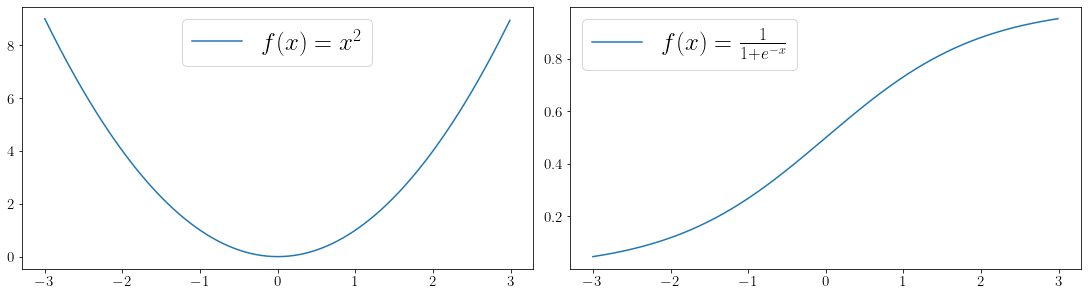

In [55]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

plt.rcParams["text.usetex"] = True
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 25


fig = plt.figure(constrained_layout=True)
fig.set_figwidth(15)

gs = GridSpec(1, 2, figure = fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

x = np.arange(-3, 3, 0.01)

ax1.plot(x, square(x), label=r"$f(x) = x^2$")
ax2.plot(x, sigmoid(x), label=r"$f(x) = \frac{1}{1 + e^{-x}}$")

ax1.legend(loc="upper center")
ax2.legend(loc="upper left")

In [75]:
# Compute the derivative of a composite function using the chain rule, f(g(x))' = f'(g(x))*g'(x), 
# at each point of an input numpy array.
def derivative_by_chain_rule(funcs, arr):
    # we assume only two functions are nested
    assert len(funcs) == 2
    # and that the input range is one dimensional
    assert arr.ndim == 1
    
    f = funcs[0]
    g = funcs[1]
    
    gx = g(arr)
    gprime_x  = derivative(g, arr)
    fprime_gx = derivative(f, gx)
    
    return fprime_gx * gprime_x

In [76]:
x = np.arange(-3, 3, 0.01)

funcs1 = [sigmoid, square]
h1 = sigmoid(square(x))
h1_prime = derivate_by_chain_rule(funcs1, x)

funcs2 = [square, sigmoid]
h2 = square(sigmoid(x))
h2_prime = derivative_by_chain_rule(funcs2, x)

print(f"h1 : {h1[:5]} \nh1': {h1_prime[:5]}")
print(f"h2 : {h2[:5]} \nh2': {h2_prime[:5]}")

h1 : [0.99987661 0.99986899 0.99986093 0.99985241 0.99984339] 
h1': [-0.00074028 -0.00078334 -0.00082874 -0.00087658 -0.00092698]
h2 : [0.00224921 0.00229246 0.00233653 0.00238141 0.00242714] 
h2': [0.00428509 0.0043654  0.00444717 0.0045304  0.00461513]


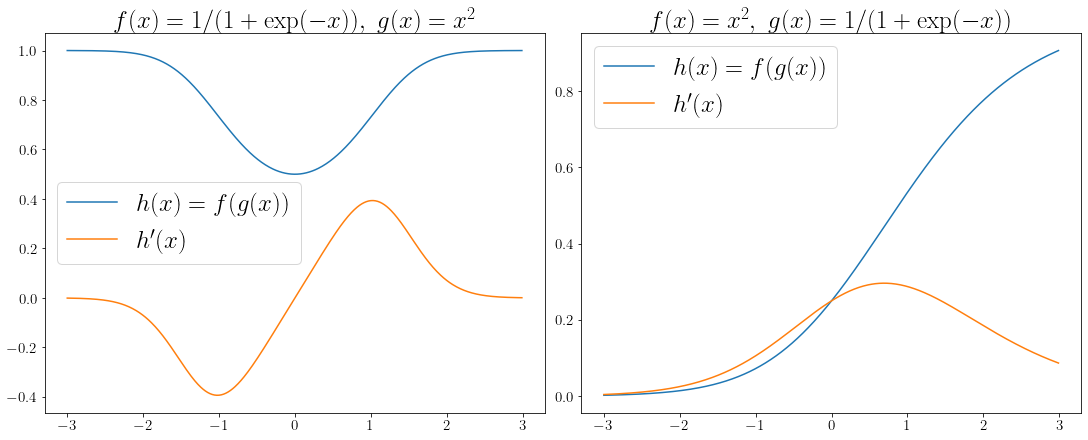

In [69]:
fig = plt.figure(constrained_layout=True)
fig.set_figwidth(15)
fig.set_figheight(6)

gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax1.plot(x, h1, label=r"$h(x) = f(g(x))$")
ax1.plot(x, h1_prime, label=r"$h^{\prime}(x)$")
ax1.set_title(r"$f(x)=1/(1+\exp(-x)),\ g(x)=x^2$")
ax1.legend(loc="center left")

ax2.plot(x, h2, label=r"$h(x) = f(g(x))$")
ax2.plot(x, h2_prime, label=r"$h^{\prime}(x)$")
ax2.set_title(r"$f(x)=x^2,\ g(x)=1/(1+\exp(-x))$")
ax2.legend(loc="upper left")

### Composition of Multiple Functions

If multiple differentiable functions are nested, the composite function itself has a derivative. Using the chain rule:

$$ f_1 \circ (f_2 \circ f_3)(x) = f_1(f_2(f_3(x))) = f_1(f_{23}(x)) = h(x) $$

$$ \frac{dh(x)}{dx} = \frac{df_1(f_{23}(x))}{df_{23}(x)} \frac{df_{23}(x)}{dx} = \frac{df_1(f_2(f_3(x)))}{df_2(f_3(x))}\frac{df_2(f_3(x))}{df_3(x)}\frac{df_3(x)}{dx}$$

$$ h^{\prime}(x) = f_1^{\prime}(f_2(f_3(x)))f_2^{\prime}(f_3(x))f_3^{\prime}(x) $$

In [71]:
# Compute the derivative of 3 composite functions using the chain rule, 
# f1(f2(f3(x)))' = f1'(f2(f3(x)))f2'(f3(x))f3'(x), at each point of an input numpy array.
def derivative_by_chain_rule_3(funcs, arr):
    # Here we also assume only the derivative of 3 composite functions,
    assert len(funcs) == 3
    # and that the input range is one dimensional 
    assert arr.ndim == 1
    
    f1 = funcs[0]
    f2 = funcs[1]
    f3 = funcs[2]
    
    f3x = f3(arr)
    f23x = f2(f3x)
    
    f123_prime = derivative(f1, f23x)
    f23_prime  = derivative(f2, f3x)
    f3_prime   = derivative(f3, arr)
    
    return f123_prime * f23_prime * f3_prime

In [78]:
x = np.arange(-3, 3, 0.01)

funcs = [sigmoid, square, leaky_relu]
h = sigmoid(square(leaky_relu(x)))
h_prime = derivative_by_chain_rule_3(funcs, x)

print(f"h : {h[:5]} \nh': {h_prime[:5]}")

h : [0.500225   0.5002235  0.50022201 0.50022052 0.50021904] 
h': [-0.00015   -0.0001495 -0.000149  -0.0001485 -0.000148 ]


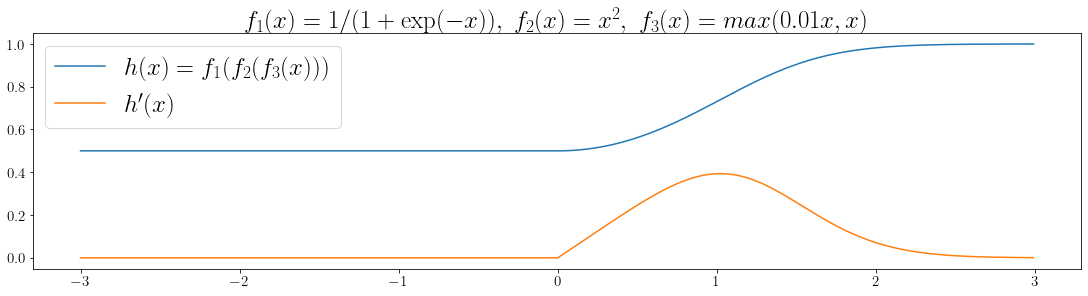

In [82]:
fig = plt.figure(constrained_layout=True)
fig.set_figwidth(15)

gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])

ax.plot(x, h, label=r"$h(x) = f_1(f_2(f_3(x)))$")
ax.plot(x, h_prime, label=r"$h^{\prime}(x)$")
ax.set_title(r"$f_1(x)=1/(1+\exp(-x)),\ f_2(x)=x^2,\ f_3(x)=max(0.01x, x)$")
ax.legend(loc="upper left")